In [1]:
from memory import Memory
from cache import CyclicCache, LRUCache
import utilities
import matplotlib.pylab as plt

# Set up

In [2]:
data = utilities.sample_data(size=10)
mem = Memory(data)
lru = LRUCache(data)
cyc = CyclicCache(data)

# The impact of memory capacity Size 

The memory hit count of CyclicCache, LRUCache in different size of memory capacity.

size 1 - LRU:  81 hits
size 1 - Cyc:  81 hits
size 2 - LRU:  62 hits
size 2 - Cyc:  62 hits
size 3 - LRU:  43 hits
size 3 - Cyc:  52 hits
size 4 - LRU:  24 hits
size 4 - Cyc:  51 hits
size 5 - LRU:   5 hits
size 5 - Cyc:   5 hits
size 6 - LRU:   5 hits
size 6 - Cyc:   5 hits
size 7 - LRU:   5 hits
size 7 - Cyc:   5 hits
size 8 - LRU:   5 hits
size 8 - Cyc:   5 hits
size 9 - LRU:   5 hits
size 9 - Cyc:   5 hits
size 10 - LRU:   5 hits
size 10 - Cyc:   5 hits


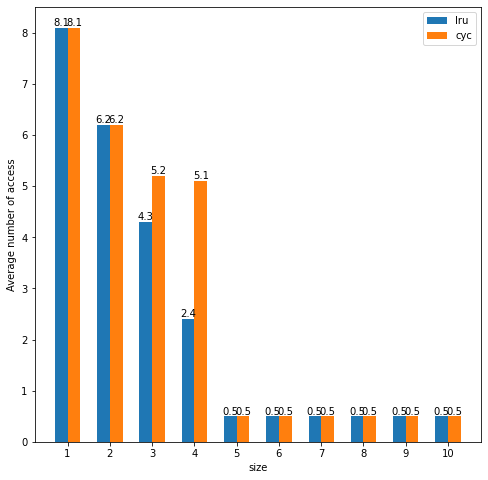

In [3]:
size = [1,2,3,4,5,6,7,8,9,10]

result_size_lru = []
result_size_cyc = []
for s in size:

    lru = LRUCache(data,size=s)
    cyc = CyclicCache(data,size=s)

    test_data = [1,2,3,4,5,4,4,3,2,1]
    for i in range(10):

        for datum in test_data:
            lru.lookup(datum)

        for datum in test_data:
            cyc.lookup(datum)

    result_size_lru.append(lru.get_memory_hit_count()/10)
    result_size_cyc.append(cyc.get_memory_hit_count()/10)

    print("size {} - LRU: {:3d} hits".format(s,lru.get_memory_hit_count()))
    print("size {} - Cyc: {:3d} hits".format(s,cyc.get_memory_hit_count()))

    
x1 = [i - 0.15 for i in range(len(size))]
x2 = [i + 0.15 for i in range(len(size))]
x =  [i for i in range(len(size))]
plt.figure(figsize=(8, 8))
plt.bar(x1,result_size_lru,width = 0.3,label = 'lru')
plt.bar(x2,result_size_cyc,width = 0.3,label = 'cyc')
for tx,ty in zip(x1,result_size_lru):
    plt.text(tx,ty,'{}'.format(ty), ha='center',va='bottom')
for tx,ty in zip(x2,result_size_cyc):
    plt.text(tx,ty,'{}'.format(ty), ha='center',va='bottom')
plt.xticks(x,size)
plt.xlabel('size')
plt.ylabel("Average number of access")
plt.legend()
plt.show()

Conclusion: The larger the memory, the faster the access 

# The differences between the behaviour of the strategies

Test example 1: The next search is for a frequently visited item

In [4]:
mem = Memory(data)
lru = LRUCache(data)
cyc = CyclicCache(data)

test_data = [1,2,3,4,5,4,4,3,2,1]
for i in range(10):
    for datum in test_data:
        mem.lookup(datum)

    for datum in test_data:
        lru.lookup(datum)

    for datum in test_data:
        cyc.lookup(datum)
    

print("Mem: {:3d} hits".format(mem.get_memory_hit_count()))
print("LRU: {:3d} hits".format(lru.get_memory_hit_count()))
print("Cyc: {:3d} hits".format(cyc.get_memory_hit_count()))

Mem: 100 hits
LRU:  24 hits
Cyc:  51 hits
